In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import io
import yfinance as yf

# Data Import

In [3]:
BTC = yf.download("BTC-USD", start = "2014-04-17", end = "2022-07-27")

[*********************100%***********************]  1 of 1 completed


In [4]:
BTC = BTC.reset_index()

In [5]:
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Tweets Volume Data Import

In [8]:
Tweet_Volume = pd.read_csv('C:/Users/523053/PycharmProjects/JUPYTER_NOTEBOOKS/Tweets_Volume.csv')
Tweet_Volume.head()

,Date,Tweets
0,17-04-2014,15215.0
1,18-04-2014,14028.0
2,19-04-2014,12337.0
3,20-04-2014,12139.0
4,21-04-2014,14244.0


In [9]:
Tweet_Volume['Date'] = pd.to_datetime(Tweet_Volume['Date'])

# Joining Both data

In [10]:
BTC_Tweets_Prices = BTC.merge(Tweet_Volume, on='Date', how='outer')
BTC_Tweets_Prices

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0
...,...,...,...,...,...,...,...,...
3066,2022-09-07,NaN,NaN,NaN,NaN,NaN,NaN,107656.0
3067,2022-10-07,NaN,NaN,NaN,NaN,NaN,NaN,104166.0
3068,2022-11-07,NaN,NaN,NaN,NaN,NaN,NaN,119029.0
3069,2022-12-07,NaN,NaN,NaN,NaN,NaN,NaN,107710.0


# Importing Google Trends Data.

In [11]:
Google_Trends = pd.read_csv('C:/Users/523053/PycharmProjects/JUPYTER_NOTEBOOKS/Googledata.csv')
Google_Trends.head()

,Date,Google Trends
0,17-04-2014,65
1,18-04-2014,60
2,19-04-2014,56
3,20-04-2014,52
4,21-04-2014,58


In [12]:
Google_Trends['Date'] = pd.to_datetime(Google_Trends['Date'])

## Joining Google Trends data to main Dataframe.

In [13]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Prices.merge(Google_Trends, on='Date', how='outer')
BTC_Tweets_Trends_Prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets,Google Trends
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0,47.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0,47.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0,53.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0,46.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0,48.0


## Only Retaining Bitcoin Price and Tweets per day Features

In [14]:
BTC_Tweets_Trends_Prices_with_Dates = BTC_Tweets_Trends_Prices.drop(['Open', 'High', 'Low','Close','Volume'], axis = 1)
BTC_Tweets_Trends_Prices_with_Dates = BTC_Tweets_Trends_Prices.dropna(axis = 0)
BTC_Tweets_Trends_Prices_with_Dates.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets,Google Trends
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0,47.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0,47.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0,53.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0,46.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0,48.0


In [15]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices.drop(['Open', 'High', 'Low','Close','Volume','Date'], axis = 1)

In [16]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices.dropna(axis = 0)

In [17]:
BTC_Tweets_Trends_Prices

,Adj Close,Tweets,Google Trends
0,457.334015,27946.0,47.0
1,424.440002,21135.0,47.0
2,394.795990,20775.0,53.0
3,408.903992,17607.0,46.0
4,398.821014,17026.0,48.0
...,...,...,...
2866,22714.978516,129257.0,35.0
2867,22465.478516,121141.0,30.0
2868,22609.164062,96410.0,27.0
2869,21361.701172,111431.0,33.0


### Changing Column Order to bring Target variable to Right position

In [18]:
cols = BTC_Tweets_Trends_Prices.columns.tolist()
cols

['Adj Close', 'Tweets', 'Google Trends']

In [19]:
cols = ['Tweets', 'Google Trends','Adj Close']
cols

['Tweets', 'Google Trends', 'Adj Close']

In [20]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices[cols]
BTC_Tweets_Trends_Prices

,Tweets,Google Trends,Adj Close
0,27946.0,47.0,457.334015
1,21135.0,47.0,424.440002
2,20775.0,53.0,394.795990
3,17607.0,46.0,408.903992
4,17026.0,48.0,398.821014
...,...,...,...
2866,129257.0,35.0,22714.978516
2867,121141.0,30.0,22465.478516
2868,96410.0,27.0,22609.164062
2869,111431.0,33.0,21361.701172


# Feature Scaling Data.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
BTC_Tweets_Trends_Prices_1 = scaler.fit_transform(BTC_Tweets_Trends_Prices)

In [23]:
BTC_Tweets_Trends_Prices_1

array([[0.05795108, 0.44210526, 0.00414359],
       [0.03883334, 0.44210526, 0.00365546],
       [0.03782286, 0.50526316, 0.00321557],
       ...,
       [0.2501221 , 0.23157895, 0.33286074],
       [0.29228442, 0.29473684, 0.31434929],
       [0.30563399, 0.30526316, 0.31253968]])

In [24]:
np.random.seed(0)

In [25]:
BTC_Tweets_Trends_Prices_1 = pd.DataFrame(BTC_Tweets_Trends_Prices_1)

In [26]:
BTC_Tweets_Trends_Prices_1

,0,1,2
0,0.057951,0.442105,0.004144
1,0.038833,0.442105,0.003655
2,0.037823,0.505263,0.003216
3,0.028931,0.431579,0.003425
4,0.027300,0.452632,0.003275
...,...,...,...
2762,0.342320,0.315789,0.334431
2763,0.319539,0.263158,0.330729
2764,0.250122,0.231579,0.332861
2765,0.292284,0.294737,0.314349


## Train Test Splitting the Data

In [27]:
X = BTC_Tweets_Trends_Prices_1.iloc[:,:-1].values 
Y = BTC_Tweets_Trends_Prices_1.iloc[:,-1].values

In [28]:
X

array([[0.05795108, 0.44210526],
       [0.03883334, 0.44210526],
       [0.03782286, 0.50526316],
       ...,
       [0.2501221 , 0.23157895],
       [0.29228442, 0.29473684],
       [0.30563399, 0.30526316]])

In [29]:
Y

array([0.00414359, 0.00365546, 0.00321557, ..., 0.33286074, 0.31434929,
       0.31253968])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Fitting Basic Linear Regression model.

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

### Prediction on Basic LR Model.

In [32]:
y_pred = regressor.predict(X_test)


In [33]:
y_pred

array([0.43684694, 0.18142174, 0.04036416, 0.44262618, 0.09698705,
       0.0670054 , 0.29939951, 0.08438205, 0.05181812, 0.0617106 ,
       0.06352586, 0.48558326, 0.04172702, 0.05056356, 0.04290587,
       0.06950303, 0.08104068, 0.16635072, 0.30614368, 0.12596448,
       0.40980357, 0.07036766, 0.07603055, 0.43319065, 0.05790533,
       0.21713673, 0.04181106, 0.04894414, 0.07180204, 0.06999783,
       0.32383729, 0.07031625, 0.07247601, 0.05233202, 0.05260215,
       0.05079346, 0.30923122, 0.040868  , 0.2254424 , 0.05331745,
       0.04016831, 0.35353624, 0.05568587, 0.12530718, 0.10012424,
       0.07459653, 0.03445471, 0.06474881, 0.05653588, 0.72430657,
       0.55613759, 0.10226732, 0.07304059, 0.14489108, 0.061304  ,
       0.08811262, 0.38016607, 0.06666515, 0.0468236 , 0.08505601,
       0.05237298, 0.31792784, 0.07630278, 0.27808224, 0.61156811,
       0.05211707, 0.04431874, 0.06089948, 0.12224813, 0.04134683,
       0.50725369, 0.06291163, 0.11407721, 0.51578086, 0.06591

In [34]:
#https://medium.com/swlh/baby-steps-towards-data-science-linear-regression-in-python-42498dee565b

# Evaluating The Basic Model.

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [40]:
result = regressor.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 61.94%


In [41]:
result = regressor.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print("R^2 : ", r2_score(Y_test, y_pred))
print("MAE :", mean_absolute_error(Y_test,y_pred))
print("MAPE :", MAPE(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred)))

Accuracy: 61.94%
R^2 :  0.6194034230800978
MAE : 0.1076425459463187
MAPE : 10.76425459463187
RMSE: 0.1544514432440762


In [36]:
#https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn

# K-fold Cross-Validation

In [42]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train,Y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 59.95%


#  Stochastic Gradient Descent


In [43]:
def run_experiment(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(Y_test, y_pred))
    print("MAE :", mean_absolute_error(Y_test,y_pred))
    print("MAPE :", MAPE(Y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred)))

In [44]:
from sklearn.linear_model import SGDRegressor
SGD_model = SGDRegressor()
run_experiment(SGD_model)
result = SGD_model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

R^2 :  0.3118922061405386
MAE : 0.1484499635659413
MAPE : 14.84499635659413
RMSE: 0.20767669815254805
Accuracy: 31.19%


# Random Forest Model.

In [45]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

## Predicting using Basic RF Model.

In [46]:
# Use the forest's predict method on the test data
Basic_RF_Model_predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(Basic_RF_Model_predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("MAPE :", MAPE(Y_test,Basic_RF_Model_predictions))


Mean Absolute Error: 0.08 degrees.
MAPE : 8.24803959865505


## Accuracy of Basic RF Model.

In [47]:
result = rf.score(X_test, Y_test)
print("Accuracy of Basic Random Forest Model : %.2f%%" % (result*100.0))

Accuracy of Basic Random Forest Model : 73.08%


# Checking Feature Importances

In [48]:
feature_list = list(BTC_Tweets_Trends_Prices.columns)
feature_list =feature_list[:-1]

In [49]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Tweets               Importance: 0.86
Variable: Google Trends        Importance: 0.14


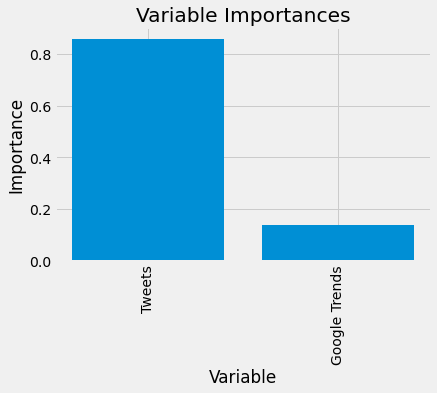

In [50]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Random Forest with only Tweets (Imp) Variable.

In [53]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Tweets')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, Y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - Y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("MAPE :", MAPE(Y_test,predictions))


Mean Absolute Error: 0.1 degrees.
MAPE : 9.957211575813014


In [54]:
result = rf_most_important.score(test_important, Y_test)
print("Accuracy of RF model with only Tweets Variable : %.2f%%" % (result*100.0))

Accuracy of RF model with only Tweets Variable : 60.76%


# Building  XGBOOST Model.

In [55]:
def scoring(model,X_test, Y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(Y_test, predictions)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    errors = abs(predictions - Y_test)
    result = model.score(X_test, Y_test)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print("MAPE :", MAPE(Y_test,predictions))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print("Accuracy of XG-Boost Model: %.2f%%" % (result*100.0))


In [56]:
from xgboost import XGBRegressor

In [57]:

xgb_regressor = XGBRegressor(random_state=42)
xgb = xgb_regressor.fit(X_train, Y_train)

scoring(xgb, X_test, Y_test)

Model Performance
Mean Absolute Error: 0.0843.
MAPE : 8.431840054555648
Mean Squared Error: 0.0182.
R^2 Score = 0.7096.
Accuracy of XG-Boost Model: 70.96%


In [51]:
# pip Install pyforest package to support run Lazy predict.

# Modelling on Data using Various Regression Models using Lazy Predict.

In [52]:
#!pip install pyforest

In [58]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

C:\Users\523053\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [54]:
#R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.
#In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [55]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 10.72it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.80       0.80  0.11        0.23
SVR                                          0.78       0.78  0.12        0.07
GradientBoostingRegressor                    0.77       0.78  0.12        0.14
MLPRegressor                                 0.77       0.77  0.12        0.47
AdaBoostRegressor                            0.76       0.76  0.12        0.04
KNeighborsRegressor                          0.75       0.76  0.12        0.02
LGBMRegressor                                0.74       0.75  0.13        0.08
HistGradientBoostingRegressor                0.74       0.74  0.13        0.57
RandomForestRegressor                        0.73       0.73  0.13        0.50
ExtraTreesRegressor                          0.71       0.72  0.13        0.35
XGBRegressor                                 0.71   

In [59]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=MAPE)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:07<00:00,  5.52it/s]

                               Adjusted R-Squared  R-Squared  RMSE  \
Model                                                                
NuSVR                                        0.80       0.80  0.11   
SVR                                          0.78       0.78  0.12   
GradientBoostingRegressor                    0.77       0.78  0.12   
MLPRegressor                                 0.77       0.77  0.12   
AdaBoostRegressor                            0.76       0.76  0.12   
KNeighborsRegressor                          0.75       0.76  0.12   
LGBMRegressor                                0.74       0.75  0.13   
HistGradientBoostingRegressor                0.74       0.74  0.13   
RandomForestRegressor                        0.73       0.73  0.13   
ExtraTreesRegressor                          0.71       0.72  0.13   
XGBRegressor                                 0.71       0.71  0.14   
BaggingRegressor                             0.70       0.70  0.14   
SGDRegressor        